# Linear Algebra | Python 3.5x
***
These notebooks assume some programming experience (have taken introductory course in Python or some programming language), to the likes of using loops, conditionals, as well as familiarity with arrays/lists. These notebooks follow along with the <a href='https://www.khanacademy.org/math/linear-algebra' style="text-decoration:None;">Khan Academy Linear Algebra</a> tract and I recommend taking a look at those while reading through these! <strong>All headers link to corresponding videos</strong>

<a href='https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra' style="color:black; text-decoration:None;"><h3>Intro: Vectors</h3></a>
- Vectors in Linear Algebra can be thought of as single dimension list in python, for example: ```v=[1,2,3,4]``` gives us a vector with dimension four, commonly written as $\mathbb{R}^4$.
- A vector is something that has both magnitude and direction. For example, 5 mph would NOT be an example of a vector, rather it is a scaler, which is just a magnitude without a direction. In order to make the 5 mph (speed) a vector we need to add direction; 5 mph to the east is a vector (velocity). Visually the vector 5 mph to the east could look something like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## hepler function for plotting vectors
def plot_vectors(vectors, colors=['blue','green','red'], 
                 sum_vec=False, two=True, scalar=None):
    if len(vectors) > 2:
        return
    plt.figure()
    ax = plt.gca()
    if two:
        a,b = [np.array(i) for i in vectors]
        if sum_vec:
            a_plus_b = a+b
            ab1,ab2 = a_plus_b
        a1,a2,b1,b2 = *a,*b

        # vector a, one starting at origin, second starting at end of vector b
        ax.quiver(0,0,a1,a2,angles='xy',scale_units='xy',
                  scale=1, color=colors[0])
        if sum_vec:
            ax.quiver(b1,b2,a1,a2,angles='xy',scale_units='xy',
                      scale=1, color=colors[0])
        # vector b, one starting at origin, second starting at end of vector a
        ax.quiver(0,0,b1,b2,angles='xy',scale_units='xy',
                  scale=1, color=colors[1])
        if sum_vec:
            ax.quiver(a1,a2,b1,b2,angles='xy',scale_units='xy',
                      scale=1, color=colors[1])
        # red solution vector a+b
        if sum_vec:
            ax.quiver(ab1,ab2,angles='xy',scale_units='xy',
                      scale=1, color=colors[2])
    else:
        a=np.array(vectors[0])
        if scalar:
            a = scalar*a
        ax.quiver(a[0],a[1], angles='xy',scale_units='xy',
                  scale=1, color=colors[0])
        
    ## providing x,y axis for reference and setting dimentions
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.ylim(-1,10)
    plt.xlim(-1,10)
    plt.yticks(range(-10,11,2))
    plt.xticks(range(-10,11,2))
    plt.draw()
    plt.show()

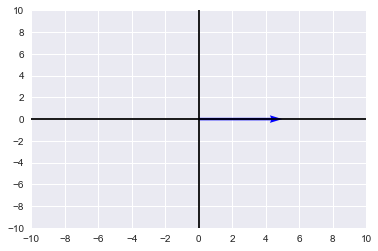

In [2]:
# where north is up, west is left, east is right, and south is down
five_mph = np.array([5,0])  # our 5 mph vector
plot_vectors([five_mph], two=False)

- Typically we will see vectors represented as a variable $\vec{v}$ with the arrow above the $v$ indicating we have a vector.
- Typically vectors are represented as singles columns, so our vector for 5 mph to the east would look like: $\vec{v} = \begin{bmatrix}5 \\ 0 \end{bmatrix}$. And when we have two dimensions, we have horizontal direction as the first entry (5).
- For the code in these notebooks I will be using row vectors, for ease, they function in the same way as column vectors. However I will use column vector notation in the explanations, as that is the how Sal does it in the Khan Academy videos.
***
A more interesting example would be a vector with values in both directions, for example $\vec{a} = \begin{bmatrix}3 \\ 4 \end{bmatrix}$, where we go right three and up four.

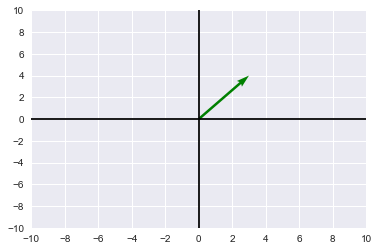

In [3]:
a = [3,4]
plot_vectors([a],colors=['green'],two=False)

***
<a href='https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/real-coordinate-spaces' style="color:black; text-decoration:None;"><h3>Real Coordinate Spaces</h3></a>
- $\mathbb{R}^2$ is the 2-dimensional real coordinate space, meaning it is all possible real valued 2-tuple. A 2-tuple meaning an ordered pair where order matters.
- $\mathbb{R}^3$ would be the 3-D real coordinate space. Which is all possible real-values 3-tuples. For example, $\vec{x} = \begin{bmatrix}0 \\ 0 \\ 0 \end{bmatrix}$ or $\vec{b} = \begin{bmatrix}-1 \\ 5 \\ 2 \end{bmatrix}$ are both 3-tuples. And to write it more formally we can say $\vec{x}, \vec{b}\in\mathbb{R}^3$, which says that $\vec{x}$ and $\vec{b}$ are members of, are in, $\mathbb{R}^3$.
- And most general $\mathbb{R}^n$ is the n-dimensional real coordinate space.

***
<a href='https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/adding-vectors' style="color:black; text-decoration:None;"><h3>Adding Vectors Algebraically and Graphically</h3></a>
- Suppose we have two vectors $\vec{a}$ and $\vec{b}$ both in $\mathbb{R}^2$, ($\vec{a}, \vec{b}\in\mathbb{R}^2$) where $\vec{a} = \begin{bmatrix}6 \\ -2 \end{bmatrix}$ and $\vec{b} = \begin{bmatrix}-4 \\4 \end{bmatrix}$.
- Adding vectors we simply just add their corresponding elements so $\vec{a} + \vec{b} = \begin{bmatrix}2 \\ 2 \end{bmatrix}$
- Graphically adding these would look like this, where $\vec{a}$ is <a style='color:blue;'>blue</a> and $\vec{b}$ is <a style='color:green'>green</a> and $\vec{a} + \vec{b}$ is <a style='color:red;'>red</a>. Adding vectors we can put the $\vec{b}$ on the end of $\vec{a}$ which gives us our resulting vector.

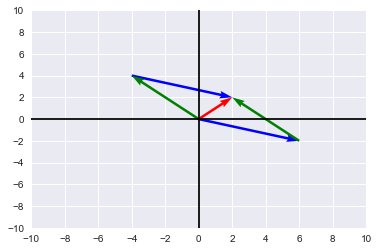

In [4]:
a = np.array([6, -2])
b = np.array([-4, 4])
plot_vectors([a,b], sum_vec=True)

- So notice we can either add <a style='color:blue'>$\vec{a}$</a> $+$ <a style='color:green'>$\vec{b}$</a> or <a style='color:green'>$\vec{b}$</a> $+$ <a style='color:blue'>$\vec{a}$</a> both ways result in our <a style='color:red;'>red</a> solution vector

***
<a href='https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/multiplying-vector-by-scalar' style='color:black; text-decoration:None;'><h3>Multiplying a Vector by a Scalar</h3></a>

- Suppose we again have a vector $\vec{a}=\begin{bmatrix}2 \\1 \end{bmatrix}$, $\vec{a}\in\mathbb{R}^2$. Scalars are just a number, so the number 3 by itself is a scalar value. 
- So to define $3\vec{a}$ we simply multiply each element in vector a by 3, so that would give us: $3\vec{a}=\begin{bmatrix}3\times2 \\ 3\times1 \end{bmatrix} = \begin{bmatrix}6 \\3 \end{bmatrix}$.
- <strong>What would this look like graphically?</strong> Let's take a look

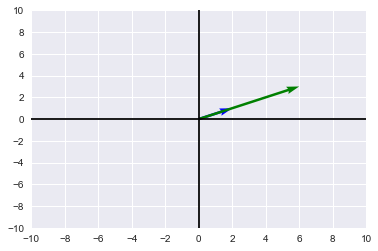

In [5]:
a = np.array([2,1])
a3 =np.array([2,1])*3
plot_vectors([a,a3], colors=['blue','green'])

- And we can see here that the resulting vector $3\vec{a}$ is just a scaled up version of the original vector $\vec{a}$, which makes sense scalars scale vectors. It increases its magnitude by 3 without changing the direction of the vector.
- This same idea hold for all scalar vector multiplication, can be seen again by multiplying $\vec{a}$ and multiplying by $-1$ or $-2$:

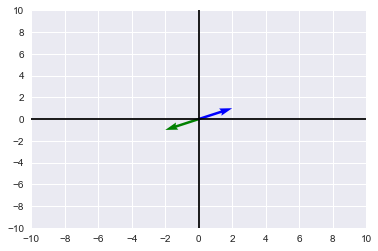

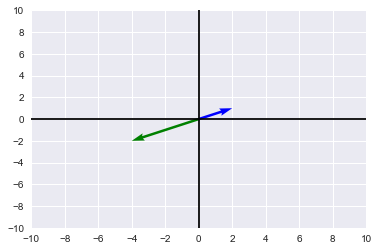

In [6]:
a_1 = a*-1
a_2 = a*-2
plot_vectors([a,a_1])
plot_vectors([a, a_2])